In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import LabelEncoder

from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols

import statsmodels.api as sm

In [7]:
df = pd.read_csv("../DATA/Health_insurance.csv")

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.shape

(1338, 7)

In [25]:
print("Number of rows = {} and number of columns = {} in Insurance data frame".format(df.shape[0], df.shape[1]))

Number of rows = 1338 and number of columns = 7 in Insurance data frame


In [13]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [52]:
print("Five point summary of numerical attributes")

df.describe().T

Five point summary of numerical attributes


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Distribution of bmi, age and charges columns

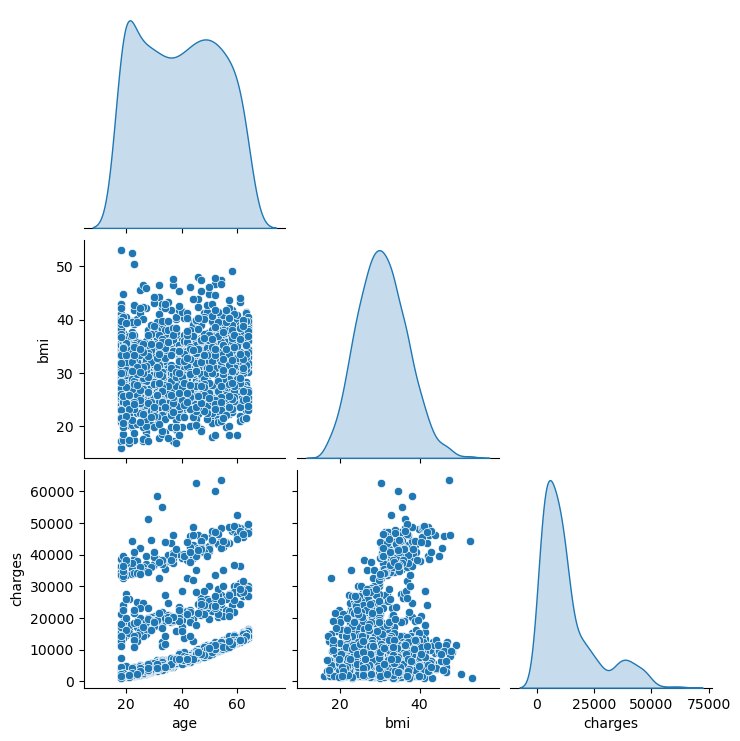

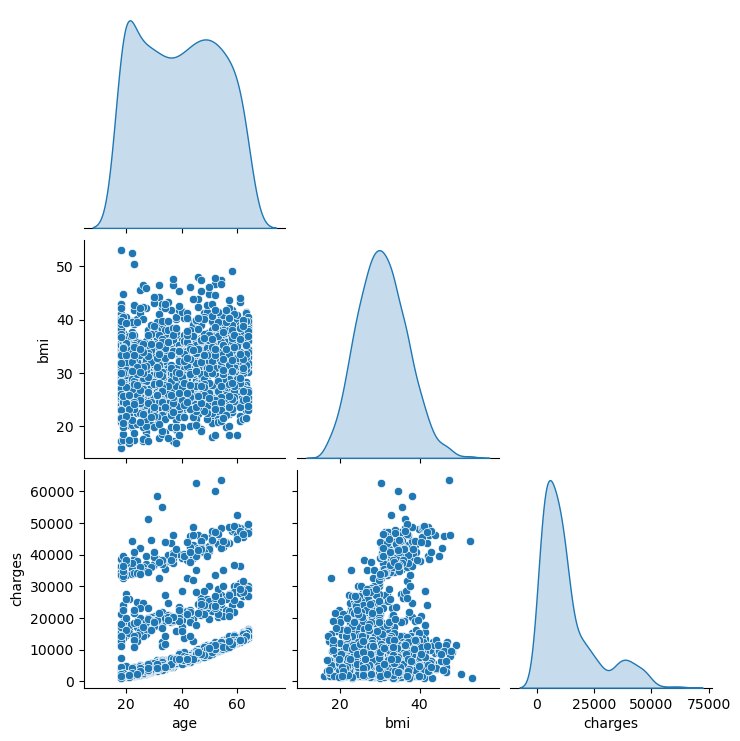

In [57]:
df_attr= df.iloc[:, [0,2,6]] # Select ‘age’, ‘bmi’ and ‘charges’ columns.

sns.pairplot(df_attr, diag_kind ="kde", corner = True); # pairplot
plt.show()

In [54]:
print("Skewness of ‘age’, ‘bmi’ and ‘charges’ columns is follows:")

df_attr.skew(axis = 0, skipna = True)

Skewness of ‘age’, ‘bmi’ and ‘charges’ columns is follows:


age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

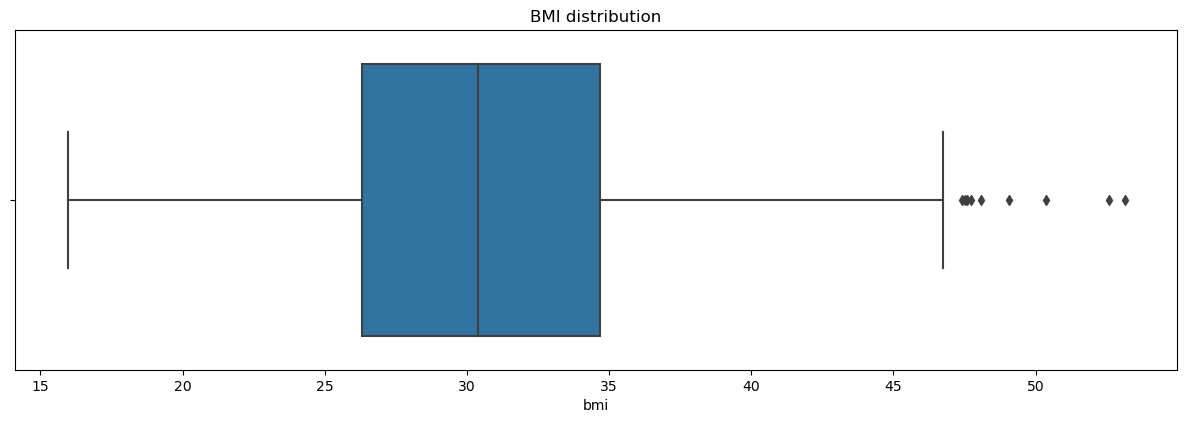

In [19]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("BMI distribution");
sns.boxplot(x=df['bmi']);
plt.show();

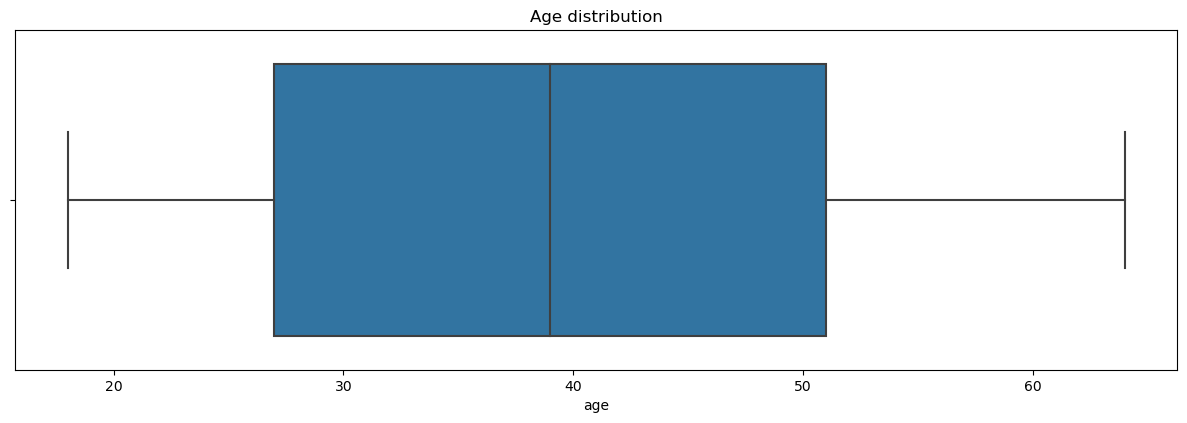

In [31]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("Age distribution")
sns.boxplot(x=df['age'])
plt.show()

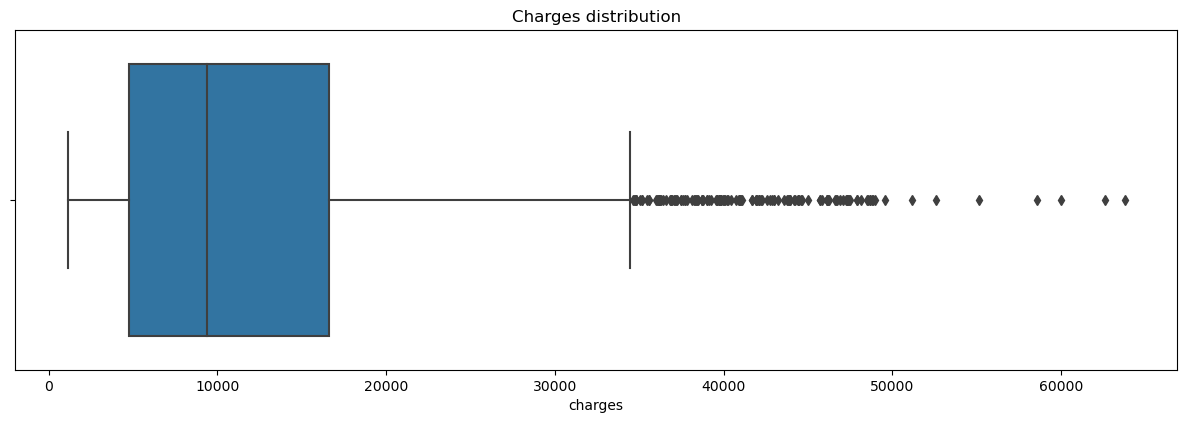

In [34]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("Charges distribution");
sns.boxplot(x=df['charges']);
plt.show();

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


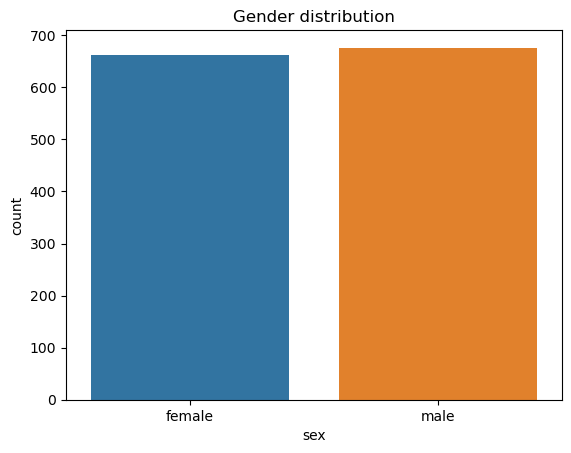

In [35]:
sns.countplot(df['sex']);
plt.title("Gender distribution");
plt.show();

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


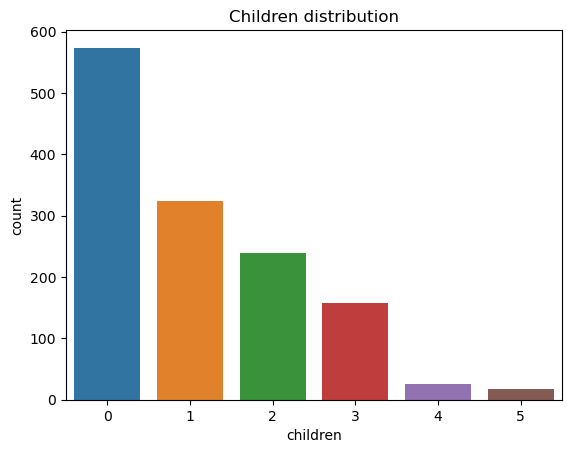

In [23]:
sns.countplot(df['children']);
plt.title("Children distribution");
plt.show();

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


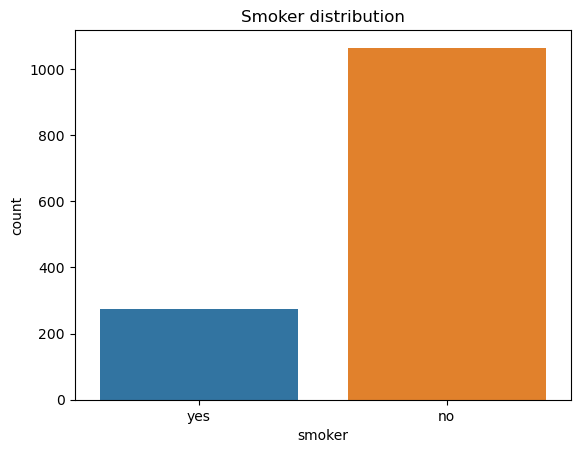

In [36]:
sns.countplot(df['smoker']);
plt.title("Smoker distribution");
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


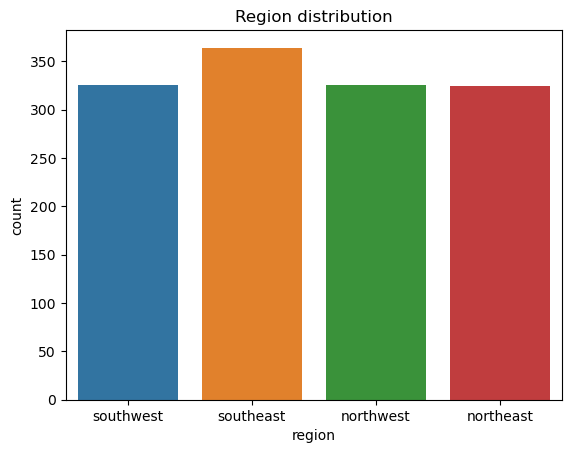

In [37]:
sns.countplot(df['region']);
plt.title("Region distribution");
plt.show();

In [39]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

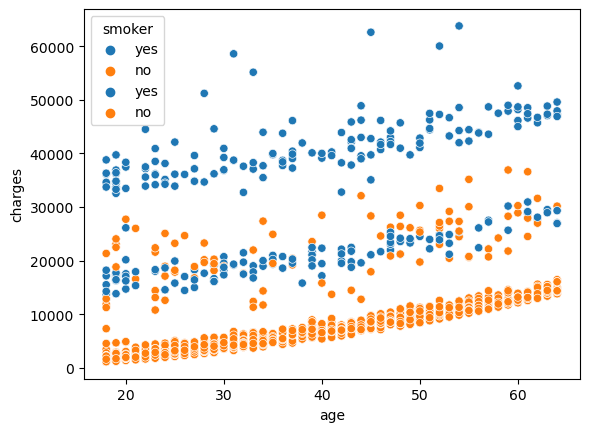

In [69]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df)
plt.show()

In [58]:
###Hypothesis

In [60]:
#H0: x̄1 = x̄2, or x̄2 - x̄1 = 0, there is no difference in charges of smokers and non-smokers

#HA: x̄2 ≠ x̄1, or x̄2 - x̄1 ≠ 0, there is a difference in charges of smokers and non-smokers



In [61]:
alpha= 0.05

In [63]:
smoker_charges= df[df['smoker']== 'yes'].charges
non_smoker_charges = df[df['smoker'] == 'no'].charges

In [64]:
t_statistic, p_value = ttest_ind(smoker_charges, non_smoker_charges)


print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 46.66492117272371
p_value = 8.271435842179102e-283


In [65]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    

In [66]:
print('Reject_Null:', reject_null)

Reject_Null: True


In [ ]:
### Does bmi of males differ significantly from that of females?

In [67]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [76]:
sns.scatterplot(x = 'age', y = 'bmi', hue = 'sex', data = df)


<AxesSubplot:xlabel='age', ylabel='bmi'>

 State the H0 and Ha
H0: x̄1 = x̄2, or x̄2 - x̄1 = 0, bmi of male and female customers is same

HA: x̄2 ≠ x̄1, or x̄2 - x̄1 ≠ bmi of male and female customers is different

In [77]:
alpha= 0.05

In [78]:
male_bmi = df[df['sex'] == 'male'].bmi
female_bmi = df[df['sex'] == 'female'].bmi

t_statistic, p_value = ttest_ind(male_bmi, female_bmi)


print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 1.696752635752224
p_value = 0.08997637178984932
